Méthode du perceptron mutlicouche (multilayer perceptron) qui est un type de réseau neuronal artificiel où l'information ne circule que dans un seul sens.

[0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0]
Accuracy : 0.9415204678362573
AUC:  0.9831081081081082


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


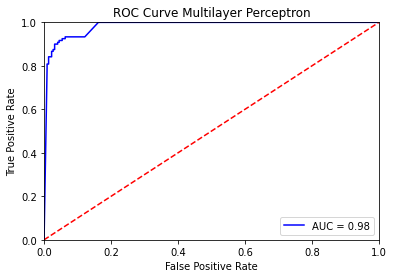

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
#from sklearn.decomposition import PCA

#Traitement du fichier .mat
cancercell = sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

#Algorithme Réseau de neurones = Perceptron multicouches
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
print (prediction)

result2 = accuracy_score(y_test,prediction)
print("Accuracy :",result2)

#ROC curve 
y_scores = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Multilayer Perceptron')
plt.show()
